In [1]:
import pandas as pd
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [4]:
X_train_full = (train[[str(i) for i in range(784)]]/255.).values.reshape(-1,28,28,1)
y_train_full = to_categorical(train['digit'].values)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 36,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split=0.20
)

In [6]:
batch_size = 32

In [7]:
train_generator = datagen.flow(
    X_train_full, y_train_full,
    batch_size=batch_size,
    subset='training'
)
validation_generator = datagen.flow(
    X_train_full, y_train_full,
    batch_size=batch_size,
    subset='validation'
)

In [9]:
model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=[28, 28, 1]))
model.add(layers.Conv2D(128, 3, activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, 3, activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, 3, activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, 3, activation="relu", padding="same"))
model.add(layers.MaxPooling2D(2))

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
#model.add(layers.Dense(128, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1000, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", 
             metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 128)       5

In [ ]:
from tensorflow.keras import callbacks
checkpoint_cb = callbacks.ModelCheckpoint("model.h5", save_best_only=True)

In [12]:
epochs = 500
history = model.fit_generator(
    train_generator, 
    epochs = epochs,
    validation_data = validation_generator,
    #callbacks=[checkpoint_cb]
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 52 steps, validate for 13 steps
Epoch 1/500
52/52 [==============================] - 5s 97ms/step - loss: 13.1444 - accuracy: 0.1830 - val_loss: 17.2548 - val_accuracy: 0.1076
Epoch 2/500
52/52 [==============================] - 1s 12ms/step - loss: 10.9227 - accuracy: 0.2599 - val_loss: 40.7330 - val_accuracy: 0.1076
Epoch 3/500
52/52 [==============================] - 1s 12ms/step - loss: 9.0801 - accuracy: 0.2880 - val_loss: 84.2721 - val_accuracy: 0.1076
Epoch 4/500
52/52 [==============================] - 1s 12ms/step - loss: 7.3045 - accuracy: 0.3228 - val_loss: 39.3796 - val_accuracy: 0.1076
Epoch 5/500
52/52 [==============================] - 1s 11ms/step - loss: 5.4595 - accuracy: 0.3496 - val_loss: 124.9090 - val_accuracy: 0.1076
Epoch 6/500
52/52 [==============================] - 1s 11ms/step - loss: 4.1726 - accuracy: 0.3508 - val_loss: 3.

52/52 [==============================] - 1s 11ms/step - loss: 0.9872 - accuracy: 0.6937 - val_loss: 1.1683 - val_accuracy: 0.6308
Epoch 56/500
52/52 [==============================] - 1s 11ms/step - loss: 1.0723 - accuracy: 0.6962 - val_loss: 1.9348 - val_accuracy: 0.6455
Epoch 57/500
52/52 [==============================] - 1s 12ms/step - loss: 1.0249 - accuracy: 0.7145 - val_loss: 1.7345 - val_accuracy: 0.6015
Epoch 58/500
52/52 [==============================] - 1s 11ms/step - loss: 1.0367 - accuracy: 0.6968 - val_loss: 1.5764 - val_accuracy: 0.6553
Epoch 59/500
52/52 [==============================] - 1s 11ms/step - loss: 1.0151 - accuracy: 0.7175 - val_loss: 1.3804 - val_accuracy: 0.6430
Epoch 60/500
52/52 [==============================] - 1s 11ms/step - loss: 1.0643 - accuracy: 0.6894 - val_loss: 1.8481 - val_accuracy: 0.6528
Epoch 61/500
52/52 [==============================] - 1s 12ms/step - loss: 1.0614 - accuracy: 0.6876 - val_loss: 1.2178 - val_accuracy: 0.6797
Epoch 62/500

52/52 [==============================] - 1s 11ms/step - loss: 0.8578 - accuracy: 0.7639 - val_loss: 1.5201 - val_accuracy: 0.6357
Epoch 113/500
52/52 [==============================] - 1s 11ms/step - loss: 0.8174 - accuracy: 0.7700 - val_loss: 1.7239 - val_accuracy: 0.6504
Epoch 114/500
52/52 [==============================] - 1s 11ms/step - loss: 0.8665 - accuracy: 0.7505 - val_loss: 1.9259 - val_accuracy: 0.6773
Epoch 115/500
52/52 [==============================] - 1s 11ms/step - loss: 0.8789 - accuracy: 0.7486 - val_loss: 1.5459 - val_accuracy: 0.6626
Epoch 116/500
52/52 [==============================] - 1s 11ms/step - loss: 0.9739 - accuracy: 0.7419 - val_loss: 1.4127 - val_accuracy: 0.6284
Epoch 117/500
52/52 [==============================] - 1s 11ms/step - loss: 0.8792 - accuracy: 0.7480 - val_loss: 1.8525 - val_accuracy: 0.6650
Epoch 118/500
52/52 [==============================] - 1s 11ms/step - loss: 0.8006 - accuracy: 0.7468 - val_loss: 1.5002 - val_accuracy: 0.7286
Epoch 

Epoch 169/500
52/52 [==============================] - 1s 11ms/step - loss: 0.7763 - accuracy: 0.8005 - val_loss: 1.4027 - val_accuracy: 0.7139
Epoch 170/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6813 - accuracy: 0.8200 - val_loss: 1.5290 - val_accuracy: 0.7335
Epoch 171/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6952 - accuracy: 0.8206 - val_loss: 1.7033 - val_accuracy: 0.6822
Epoch 172/500
52/52 [==============================] - 1s 11ms/step - loss: 0.7410 - accuracy: 0.7968 - val_loss: 1.7341 - val_accuracy: 0.6797
Epoch 173/500
52/52 [==============================] - 1s 11ms/step - loss: 0.8017 - accuracy: 0.7791 - val_loss: 2.0402 - val_accuracy: 0.6919
Epoch 174/500
52/52 [==============================] - 1s 11ms/step - loss: 0.7446 - accuracy: 0.8121 - val_loss: 2.0468 - val_accuracy: 0.7042
Epoch 175/500
52/52 [==============================] - 1s 11ms/step - loss: 0.7266 - accuracy: 0.8035 - val_loss: 2.7292 - val_accuracy:

Epoch 226/500
52/52 [==============================] - 1s 11ms/step - loss: 0.7079 - accuracy: 0.8176 - val_loss: 2.0582 - val_accuracy: 0.6797
Epoch 227/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6958 - accuracy: 0.8310 - val_loss: 1.8109 - val_accuracy: 0.7408
Epoch 228/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6772 - accuracy: 0.8298 - val_loss: 1.5029 - val_accuracy: 0.6968
Epoch 229/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6379 - accuracy: 0.8334 - val_loss: 1.2865 - val_accuracy: 0.7237
Epoch 230/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6872 - accuracy: 0.8292 - val_loss: 2.3924 - val_accuracy: 0.7359
Epoch 231/500
52/52 [==============================] - 1s 11ms/step - loss: 0.7437 - accuracy: 0.8322 - val_loss: 1.3721 - val_accuracy: 0.7213
Epoch 232/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6714 - accuracy: 0.8286 - val_loss: 3.0400 - val_accuracy:

Epoch 283/500
52/52 [==============================] - 1s 11ms/step - loss: 0.7112 - accuracy: 0.8377 - val_loss: 4.2490 - val_accuracy: 0.7139
Epoch 284/500
52/52 [==============================] - 1s 11ms/step - loss: 0.7260 - accuracy: 0.8450 - val_loss: 2.0747 - val_accuracy: 0.7066
Epoch 285/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6969 - accuracy: 0.8347 - val_loss: 1.9769 - val_accuracy: 0.6993
Epoch 286/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6972 - accuracy: 0.8420 - val_loss: 1.7394 - val_accuracy: 0.7311
Epoch 287/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6982 - accuracy: 0.8444 - val_loss: 2.2428 - val_accuracy: 0.7262
Epoch 288/500
52/52 [==============================] - 1s 11ms/step - loss: 0.7478 - accuracy: 0.8353 - val_loss: 1.5446 - val_accuracy: 0.7115
Epoch 289/500
52/52 [==============================] - 1s 11ms/step - loss: 0.5812 - accuracy: 0.8499 - val_loss: 2.3841 - val_accuracy:

Epoch 340/500
52/52 [==============================] - 1s 11ms/step - loss: 0.7566 - accuracy: 0.8469 - val_loss: 2.4824 - val_accuracy: 0.7213
Epoch 341/500
52/52 [==============================] - 1s 11ms/step - loss: 0.7375 - accuracy: 0.8493 - val_loss: 1.5351 - val_accuracy: 0.7555
Epoch 342/500
52/52 [==============================] - 1s 12ms/step - loss: 0.6783 - accuracy: 0.8505 - val_loss: 2.5630 - val_accuracy: 0.7237
Epoch 343/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6458 - accuracy: 0.8438 - val_loss: 3.0686 - val_accuracy: 0.6895
Epoch 344/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6438 - accuracy: 0.8475 - val_loss: 2.3008 - val_accuracy: 0.7237
Epoch 345/500
52/52 [==============================] - 1s 11ms/step - loss: 0.5352 - accuracy: 0.8743 - val_loss: 2.4251 - val_accuracy: 0.6601
Epoch 346/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6961 - accuracy: 0.8530 - val_loss: 2.4500 - val_accuracy:

Epoch 397/500
52/52 [==============================] - 1s 12ms/step - loss: 0.5445 - accuracy: 0.8780 - val_loss: 1.6273 - val_accuracy: 0.7555
Epoch 398/500
52/52 [==============================] - 1s 11ms/step - loss: 0.5870 - accuracy: 0.8646 - val_loss: 2.0667 - val_accuracy: 0.7555
Epoch 399/500
52/52 [==============================] - 1s 12ms/step - loss: 0.5545 - accuracy: 0.8768 - val_loss: 1.5705 - val_accuracy: 0.7457
Epoch 400/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6355 - accuracy: 0.8707 - val_loss: 3.1631 - val_accuracy: 0.7017
Epoch 401/500
52/52 [==============================] - 1s 11ms/step - loss: 0.7070 - accuracy: 0.8536 - val_loss: 2.7667 - val_accuracy: 0.6919
Epoch 402/500
52/52 [==============================] - 1s 11ms/step - loss: 0.8055 - accuracy: 0.8566 - val_loss: 2.0827 - val_accuracy: 0.7653
Epoch 403/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6871 - accuracy: 0.8639 - val_loss: 2.6640 - val_accuracy:

Epoch 454/500
52/52 [==============================] - 1s 11ms/step - loss: 0.5880 - accuracy: 0.8835 - val_loss: 2.9943 - val_accuracy: 0.7433
Epoch 455/500
52/52 [==============================] - 1s 11ms/step - loss: 0.5957 - accuracy: 0.8883 - val_loss: 2.7584 - val_accuracy: 0.7531
Epoch 456/500
52/52 [==============================] - 1s 12ms/step - loss: 0.5875 - accuracy: 0.8792 - val_loss: 2.4895 - val_accuracy: 0.7262
Epoch 457/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6096 - accuracy: 0.8780 - val_loss: 1.7676 - val_accuracy: 0.7922
Epoch 458/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6158 - accuracy: 0.8865 - val_loss: 2.6974 - val_accuracy: 0.7262
Epoch 459/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6145 - accuracy: 0.8792 - val_loss: 1.8597 - val_accuracy: 0.7017
Epoch 460/500
52/52 [==============================] - 1s 11ms/step - loss: 0.6329 - accuracy: 0.8688 - val_loss: 2.0150 - val_accuracy:

In [ ]:
#model = models.load_model("model.h5")

In [13]:
print(
    f"Train accuracy={max(history.history['accuracy']):.5f}, " +
    f"Validation accuracy={max(history.history['val_accuracy']):.5f}"
)

Train accuracy=0.90238, Validation accuracy=0.79218


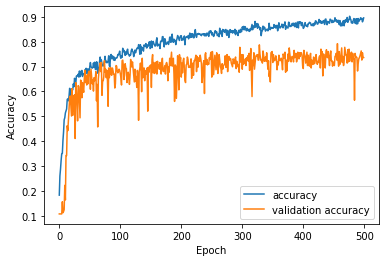

In [14]:
plt.figure()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
X_test = (test[[str(i) for i in range(784)]] / 255.).values.reshape(-1, 28, 28, 1)
results = model.predict_classes(X_test)

In [16]:
import datetime
nowDate = datetime.datetime.now()
cur = nowDate.strftime("%m%d%H%M")
filename = 'submission' + cur + '.csv'
submission.digit = results
submission.to_csv(filename, index=False)